In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

## Statistical Analysis

In [4]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [5]:
# Adding total sqfootage feature
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
df = df.drop(["TotalBsmtSF"], axis=1)
df = df.drop(["1stFlrSF"], axis=1)
df = df.drop(["2ndFlrSF"], axis=1)
df = df.drop(["Id"], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


### Splitting into numeric & categorical data

In [6]:
# list of numerical variables
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(categorical_features))

# visualise the categorical variables
df[categorical_features].head()

Number of categorical variables:  47


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


In [7]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

numerical_features

Number of numerical variables:  31


['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'TotalSF']

In [8]:
cat_features = df[categorical_features]
num_features = df[numerical_features]

In [9]:
df.shape

(1460, 78)

## Feature Engineering

### Missing Data

-If there is a larger number of missing values, then it is better to drop those cases (rather than do imputation) and replace them. <br>
-If the number of the cases is less than 5% of the sample, then we can drop them.<br>
-For remaining missing values, we may do data imputation to replace them.

<AxesSubplot:>

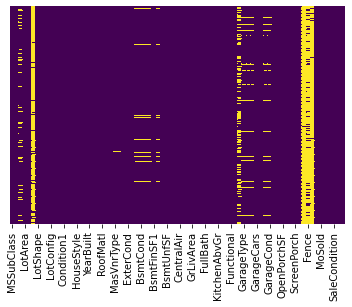

In [10]:
# Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# Printing total numbers and percentage of missing df

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent Missing'])
missing_df.head(20)

,Total,Percent Missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [12]:
# check what is percentage of missing values in numerical dataframe
for col in num_features.columns.values:
    missing_values = num_features[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100))
    
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        num_features = num_features.drop(col, axis = 1)
    # if there is less than 260 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        num_features = num_features.fillna(num_features[col].median())

In [13]:
num_features.isnull().any()

LotFrontage      False
LotArea          False
OverallQual      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
SalePrice        False
TotalSF          False
dtype: bool

In [14]:
# removing the features
cat_features.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)
cat_features.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,12,2008,WD,Normal


In [15]:
# replacing nan values
for col in cat_features.columns:
    cat_features[col].fillna(cat_features[col].value_counts().index[0], inplace=True)

In [16]:
cat_features.isnull().any()

MSSubClass       False
MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallCond      False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
dtype: bool

### Check for Skeweness

array([[<AxesSubplot:title={'center':'3SsnPorch'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'GarageYrBlt'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>],
       [<AxesSubplot:title={'center':'Lo

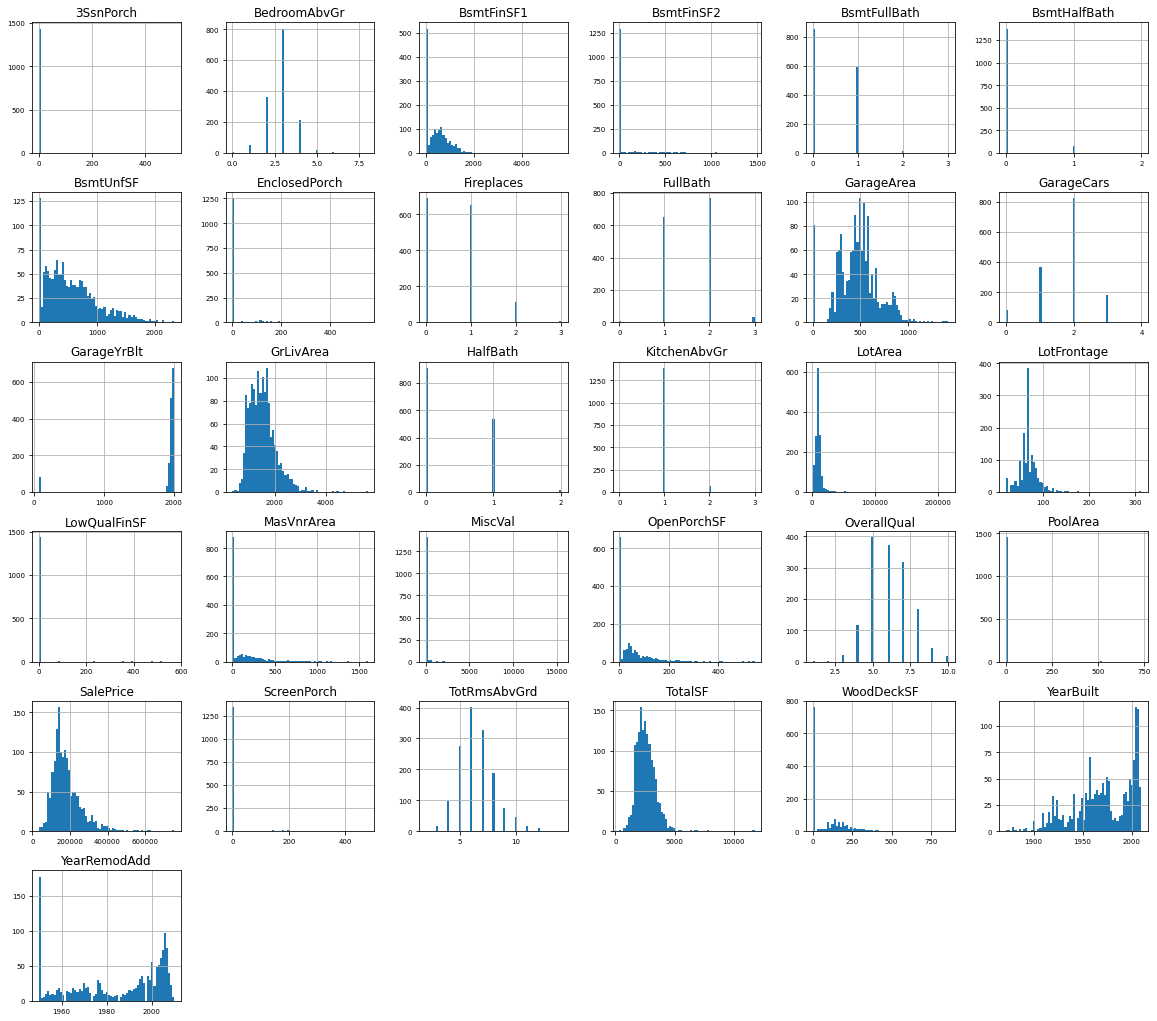

In [17]:
num_features.hist(figsize=(20, 18), bins=65, xlabelsize=7, ylabelsize=7)

In [18]:
num_features.skew()

LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.678727
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -3.868168
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
SalePrice         1.882876
TotalSF           1.776700
dtype: float64

In [19]:
from scipy.stats import skew
num_features_skew = num_features.apply(lambda x: skew(x.dropna()))
num_features_skew = num_features_skew[num_features_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
num_features[num_features_skew.index] = np.log1p(num_features[num_features_skew.index])

In [20]:
num_features_skew

LotFrontage       2.406671
LotArea          12.195142
MasVnrArea        2.675974
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
SalePrice         1.880941
TotalSF           1.774874
dtype: float64

array([[<AxesSubplot:title={'center':'3SsnPorch'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'GarageYrBlt'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>],
       [<AxesSubplot:title={'center':'Lo

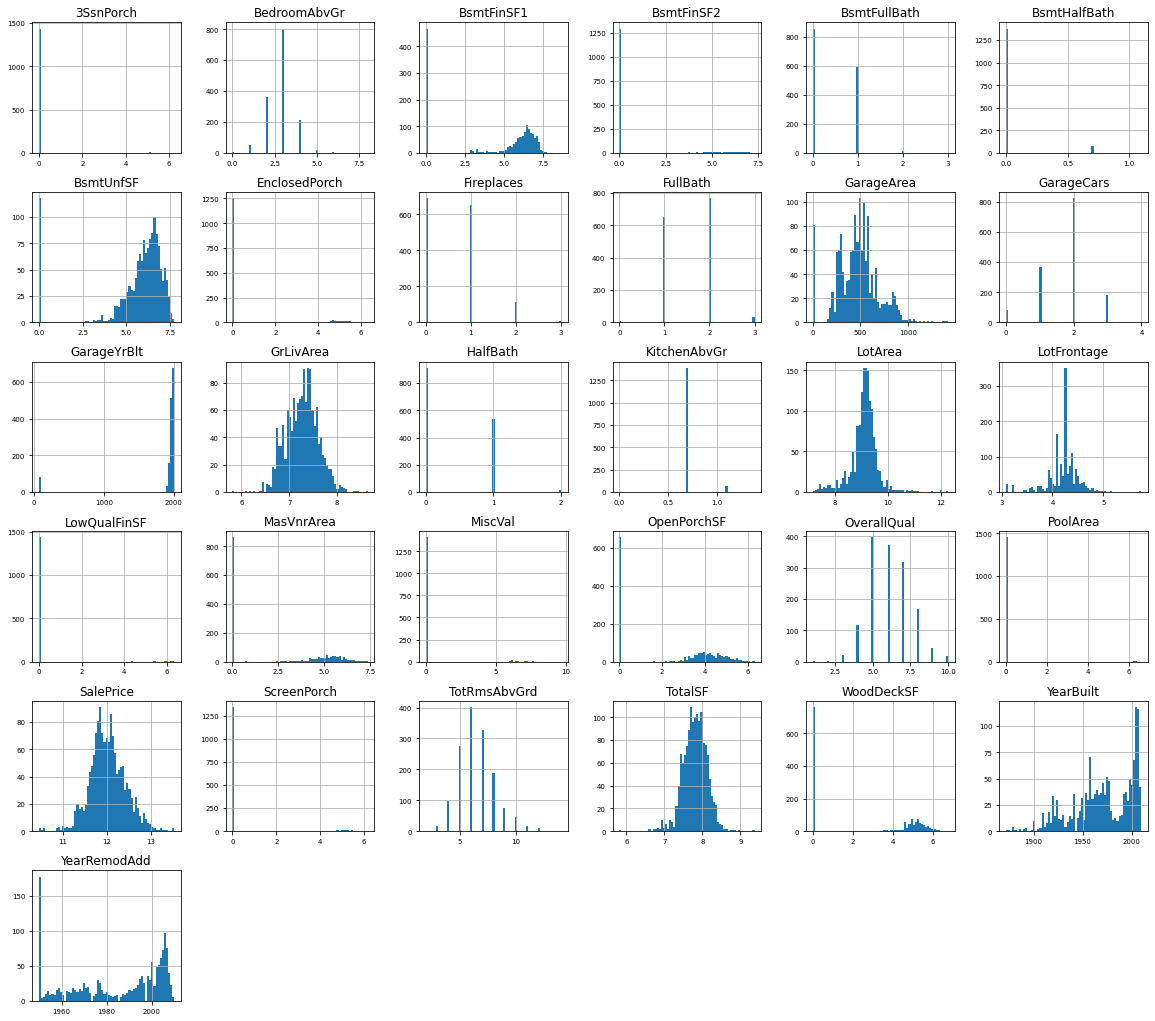

In [21]:
num_features.hist(figsize=(20, 18), bins=65, xlabelsize=7, ylabelsize=7)

<AxesSubplot:xlabel='SalePrice'>

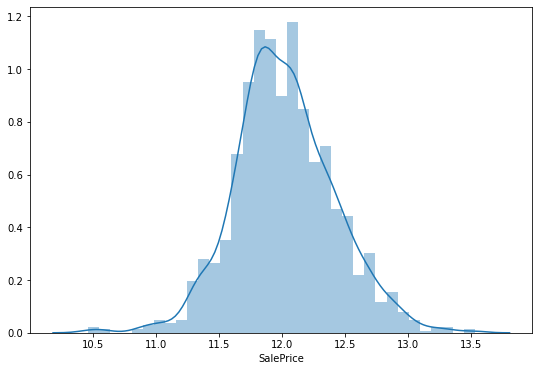

In [22]:
plt.figure(figsize=(9,6))
sns.distplot(num_features.SalePrice)

### Correlation

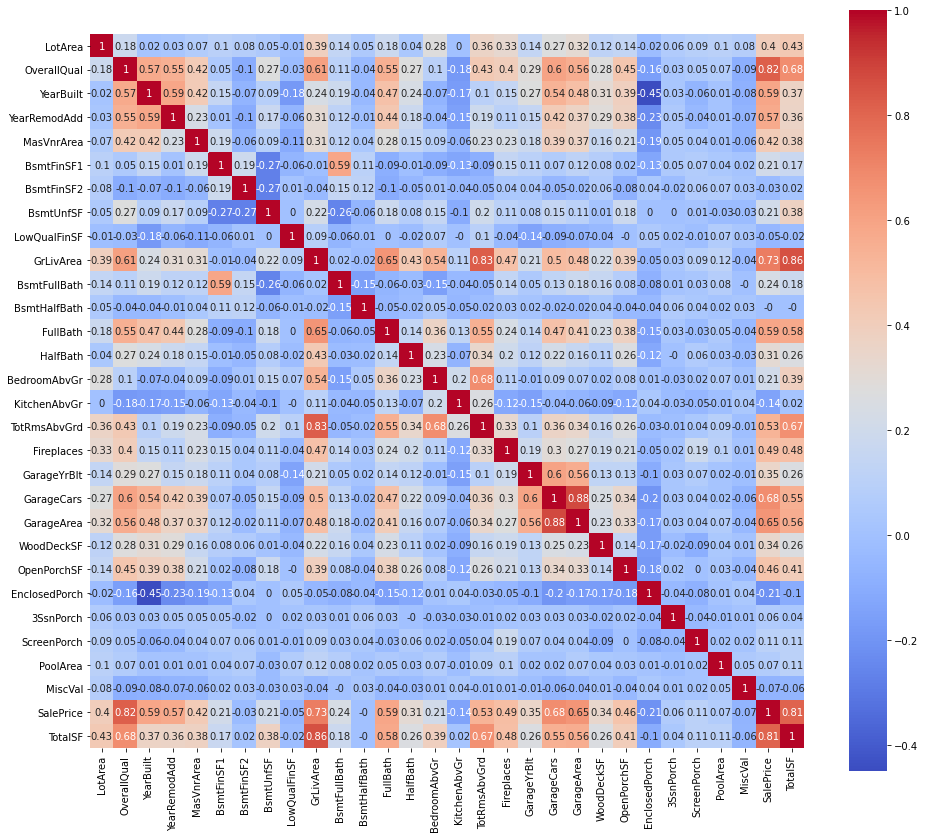

In [23]:
corr_df = num_features.iloc[:, 1:].corr().round(2) # rounding to 1 decimal point to make it easier to observe 

plt.figure(figsize=(16, 14))
sns.heatmap(corr_df, cmap='coolwarm', annot=True, square=True, annot_kws=dict(size=10), cbar=True)
plt.show()

### Top features correlated with SalePrice

In [24]:
print("Find most important features relative to target")
corr = num_features.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
TotalSF          0.807140
GrLivArea        0.730254
GarageCars       0.680625
GarageArea       0.650888
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
OpenPorchSF      0.459948
MasVnrArea       0.420006
LotArea          0.399923
GarageYrBlt      0.349933
LotFrontage      0.346237
WoodDeckSF       0.343039
HalfBath         0.313982
BsmtFullBath     0.236224
BedroomAbvGr     0.209043
BsmtUnfSF        0.208233
BsmtFinSF1       0.208099
ScreenPorch      0.105857
PoolArea         0.069949
3SsnPorch        0.058827
BsmtHalfBath    -0.004890
BsmtFinSF2      -0.030361
LowQualFinSF    -0.054513
MiscVal         -0.067054
KitchenAbvGr    -0.144278
EnclosedPorch   -0.207263
Name: SalePrice, dtype: float64

### Feature Scaling


In [25]:
numeric = num_features.drop('SalePrice',axis=1)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric = scaler.fit_transform(numeric)

In [27]:
a = pd.DataFrame(numeric, columns =[num_features.drop('SalePrice',axis=1)] )
a.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
0,0.413268,0.366271,0.666667,0.949275,0.883333,0.716038,0.759508,0.0,0.646838,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.996394,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,0.572376
1,0.490307,0.391245,0.555556,0.753623,0.433333,0.000000,0.797188,0.0,0.728731,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.982483,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.0,0.0,0.0,0.567740
2,0.429990,0.422289,0.666667,0.934783,0.866667,0.690361,0.716357,0.0,0.783246,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.995363,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,0.587303
3,0.383633,0.390223,0.666667,0.311594,0.333333,0.000000,0.622780,0.0,0.811361,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.993818,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.0,0.0,0.0,0.562004
4,0.508439,0.468694,0.777778,0.927536,0.833333,0.794318,0.750841,0.0,0.798858,0.0,0.666289,0.333333,0.00000,0.666667,0.5,0.500,0.5,0.583333,0.333333,0.994848,0.75,0.589563,0.779126,0.704481,0.000000,0.0,0.0,0.0,0.0,0.646702


### Dummy Encoding

In [28]:
cat_features.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
# Using pandas function to Convert categorical variable into dummy variables

cat_features_dummies = pd.get_dummies(cat_features,drop_first=True)

In [30]:
cat_features_dummies

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,

In [31]:
print("Numerical features : " + str(len(a.columns)))
print("Categorical features : " + str(len(cat_features_dummies.columns)))

Numerical features : 30
Categorical features : 237


In [32]:
# Merging 3 dataframe for furthere analysis

final_data = pd.concat([a, cat_features_dummies,num_features['SalePrice']], axis=1)

In [33]:
final_data

,"(LotFrontage,)","(LotArea,)","(OverallQual,)","(YearBuilt,)","(YearRemodAdd,)","(MasVnrArea,)","(BsmtFinSF1,)","(BsmtFinSF2,)","(BsmtUnfSF,)","(LowQualFinSF,)","(GrLivArea,)","(BsmtFullBath,)","(BsmtHalfBath,)","(FullBath,)","(HalfBath,)","(BedroomAbvGr,)","(KitchenAbvGr,)","(TotRmsAbvGrd,)","(Fireplaces,)","(GarageYrBlt,)","(GarageCars,)","(GarageArea,)","(WoodDeckSF,)","(OpenPorchSF,)","(EnclosedPorch,)","(3SsnPorch,)","(ScreenPorch,)","(PoolArea,)","(MiscVal,)","(TotalSF,)",MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,M

## Model Building


### Train Test Split

In [34]:
x = final_data.drop('SalePrice',axis=1) #independent variable
y = final_data.SalePrice #dependent variable

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [36]:
len(X_train), len(y_train)

(1022, 1022)

In [37]:
len(X_test), len(y_test)

(438, 438)

### Model 1 - Linear Regression

In [38]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS
model1 = sm.OLS(y_train, X_train).fit()
# Note the Swap of X and Y

In [39]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     59.73
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:18:52   Log-Likelihood:                 1063.1
No. Observations:                1022   AIC:                            -1608.
Df Residuals:                     763   BIC:                            -331.4
Df Model:                         258                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
('LotFrontage',)          0.0277      0.051      0.548      0.584      -0.072       0.127
('LotArea',)              0.4381      0.082      5.334      0.000       0.277       0.599
('OverallQual',)          0.3498      0.052      6.772      0.000       0.248       0.451
('YearBuilt',)            0.3019      0.064      4.738      0.000       0.177       0.427
('YearRemodAdd',)         0.0621      0.019      3.336      0.001       0.026       0.099
('MasVnrArea',)           0.0013      0.040      0.033      0.974      -0.078       0.081
('BsmtFinSF1',)           0.1000      0.056      1.794      0.073      -0.009       0.209
('BsmtFinSF2',)           0.0549      0.108      0.508      0.612      -0.157       0.267
('BsmtUnfSF',)           -0.0498      0.027     -1.867      0.062      -0.102       0.003
('LowQualFinSF',)        -0.0018      0.041     -0.043      0.965      -0.082       0.079
('GrLivArea',)            0.6340      0.167      3.798      0.000       0.306       0.962
('BsmtFullBath',)         0.0674      0.033      2.060      0.040       0.003       0.132
('BsmtHalfBath',)         0.0108      0.026      0.416      0.678      -0.040       0.062
('FullBath',)             0.0723      0.036      2.012      0.045       0.002       0.143
('HalfBath',)             0.0488      0.023      2.108      0.035       0.003       0.094
('BedroomAbvGr',)         0.0462      0.063      0.737      0.461      -0.077       0.169
('KitchenAbvGr',)        -0.1821      0.135     -1.347      0.178      -0.447       0.083
('TotRmsAbvGrd',)         0.0054      0.063      0.086      0.932      -0.119       0.129
('Fireplaces',)           0.0605      0.025      2.430      0.015       0.012       0.109
('GarageYrBlt',)          0.0304      0.026      1.180      0.239      -0.020       0.081
('GarageCars',)           0.0844      0.050      1.678      0.094      -0.014       0.183
('GarageArea',)           0.1431      0.061      2.357      0.019       0.024       0.262
('WoodDeckSF',)           0.0204      0.011      1.909      0.057      -0.001       0.041
('OpenPorchSF',)          0.0171      0.013      1.313      0.190      -0.008       0.043
('EnclosedPorch',)        0.0140      0.016      0.864      0.388      -0.018       0.046
('3SsnPorch',)            0.0422      0.033      1.270      0.204      -0.023       0.107
('ScreenPorch',)          0.0479      0.016      3.002      0.003       0.017       0.079
('PoolArea',)             0.2043      0.070      2.922      0.004       0.067       0.342
('MiscVal',)             -0.0294      0.029     -1.008      0.314      -0.087       0.028
('TotalSF',)              0.8423      0.194      4.331      0.000       0.460       1.224
MSSubClass_160           -0.0438      0.058     -0.761      0.447      -0.157       0.069
MSSubClass_180         

In [40]:
def rmse(pred, target):
    differences = pred - target          # the DIFFERENCEs.
    differences_squared = differences ** 2           # the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()         # the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)          # ROOT of ^
    return rmse_val

In [41]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)

# Predicting the model on test data
pred_1 = model1.predict(X_test)

In [42]:
repo1 = pd.Series({'Model': 'Simple Linear Regression Model',
                   'R-Squared Value' : model1.rsquared,
                   'Adj.R-Squared Value': model1.rsquared_adj,
                   'RMSE': rmse(pred_1, y_test)})

model1_report = models_report.append(repo1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Simple Linear Regression Model,0.952826,0.936875,0.381808


### Model 2 - Linear Regression Removing Mulitcollinearity 

"Multicollinearity" refers to predictors that are correlated with other predictors. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other.<br>

A rule of thumb for interpreting the Variance Inflation Factor:<br>

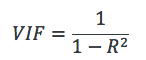


 - 1 = not correlated.<br>
 - Between 1 and 10 = moderately correlated.<br>
 - Greater than 80 = highly correlated.<br>

In [43]:
# calculating VIF
col_names = X_train.columns

print('Variance Inflation Factor')
print('-------------------------')
print('\n')

for i in np.arange(0,len(col_names)):
    xvars = list(col_names)
    yvar = xvars.pop(i)
    mod = sm.OLS(X_train[yvar],(X_train[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))

Variance Inflation Factor
-------------------------


('LotFrontage',) 3.834
('LotArea',) 7.516
('OverallQual',) 6.456
('YearBuilt',) 21.018
('YearRemodAdd',) 4.32
('MasVnrArea',) 21.71
('BsmtFinSF1',) 38.819
('BsmtFinSF2',) 73.254
('BsmtUnfSF',) 4.089
('LowQualFinSF',) 2.468
('GrLivArea',) 40.048
('BsmtFullBath',) 3.34
('BsmtHalfBath',) 1.592
('FullBath',) 4.432
('HalfBath',) 3.414
('BedroomAbvGr',) 4.215
('KitchenAbvGr',) 7.641
('TotRmsAbvGrd',) 7.683
('Fireplaces',) 3.044
('GarageYrBlt',) 3.363
('GarageCars',) 8.792
('GarageArea',) 8.301
('WoodDeckSF',) 1.794
('OpenPorchSF',) 2.077
('EnclosedPorch',) 1.983
('3SsnPorch',) 1.413
('ScreenPorch',) 1.425
('PoolArea',) 2.273
('MiscVal',) 1.583
('TotalSF',) 30.556
MSSubClass_160 14.525
MSSubClass_180 4.323
MSSubClass_190 inf
MSSubClass_20 inf
MSSubClass_30 inf
MSSubClass_40 inf
MSSubClass_45 inf
MSSubClass_50 inf
MSSubClass_60 inf
MSSubClass_70 inf
MSSubClass_75 inf
MSSubClass_80 inf
MSSubClass_85 inf
MSSubClass_90 inf
MSZoning_FV 26.488
M

### Removing variables having VIF above 90

In [44]:
data_multi = final_data.drop(['MSSubClass_20','MSSubClass_60', 'MSZoning_RL','RoofStyle_Gable','RoofStyle_Hip',
                              'Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageType_Attchd',
                              'GarageType_Detchd','GarageQual_TA','GarageCond_TA','SaleCondition_Partial'], axis=1)

In [45]:
data_multi.shape

(1460, 255)

In [46]:
a = data_multi.drop('SalePrice',axis=1) #independent variable
b = data_multi.SalePrice #dependent variable

In [47]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(a,b,test_size=0.3, random_state=37)

In [48]:
#vif_90 = ['MSSubClass_20','MSSubClass_60', 'MSZoning_RL','RoofStyle_Gable','RoofStyle_Hip','Exterior1st_MetalSd',
#          'Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageType_Attchd', 'GarageType_Detchd','GarageQual_TA',
#          'GarageCond_TA','SaleCondition_Partial']
           
# custom function to remove variables having higer VIF
#to_keep = [x for x in X_train2 if x not in vif_90]

# print(to_keep)
#X_train2 = X_train2[to_keep]
#X_train2.head()

In [49]:
#Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS
model2 = sm.OLS(y_train2,X_train2).fit()
# Note the Swap of X and Y

In [50]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     64.55
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:19:13   Log-Likelihood:                 1035.1
No. Observations:                1022   AIC:                            -1580.
Df Residuals:                     777   BIC:                            -372.5
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
('LotFrontage',)          0.0117      0.051      0.230      0.818      -0.088       0.111
('LotArea',)              0.5042      0.076      6.625      0.000       0.355       0.654
('OverallQual',)          0.3114      0.053      5.890      0.000       0.208       0.415
('YearBuilt',)            0.2498      0.066      3.802      0.000       0.121       0.379
('YearRemodAdd',)         0.0600      0.019      3.164      0.002       0.023       0.097
('MasVnrArea',)           0.0006      0.041      0.015      0.988      -0.079       0.080
('BsmtFinSF1',)           0.0782      0.057      1.377      0.169      -0.033       0.190
('BsmtFinSF2',)          -0.0215      0.080     -0.268      0.789      -0.179       0.136
('BsmtUnfSF',)           -0.0360      0.026     -1.396      0.163      -0.087       0.015
('LowQualFinSF',)         0.0261      0.039      0.670      0.503      -0.050       0.103
('GrLivArea',)            0.6692      0.160      4.193      0.000       0.356       0.982
('BsmtFullBath',)         0.0973      0.033      2.929      0.003       0.032       0.163
('BsmtHalfBath',)         0.0291      0.028      1.056      0.291      -0.025       0.083
('FullBath',)             0.0980      0.037      2.680      0.008       0.026       0.170
('HalfBath',)             0.0790      0.024      3.350      0.001       0.033       0.125
('BedroomAbvGr',)        -0.0847      0.061     -1.384      0.167      -0.205       0.035
('KitchenAbvGr',)        -0.3128      0.132     -2.367      0.018      -0.572      -0.053
('TotRmsAbvGrd',)         0.0542      0.063      0.858      0.391      -0.070       0.178
('Fireplaces',)           0.0836      0.027      3.154      0.002       0.032       0.136
('GarageYrBlt',)          0.0450      0.025      1.796      0.073      -0.004       0.094
('GarageCars',)           0.0322      0.050      0.643      0.521      -0.066       0.131
('GarageArea',)           0.1491      0.060      2.503      0.013       0.032       0.266
('WoodDeckSF',)           0.0135      0.011      1.235      0.217      -0.008       0.035
('OpenPorchSF',)         -0.0014      0.013     -0.102      0.919      -0.027       0.025
('EnclosedPorch',)       -0.0117      0.016     -0.726      0.468      -0.043       0.020
('3SsnPorch',)           -0.0153      0.034     -0.446      0.656      -0.083       0.052
('ScreenPorch',)          0.0569      0.017      3.385      0.001       0.024       0.090
('PoolArea',)             0.0123      0.098      0.126      0.900      -0.181       0.205
('MiscVal',)             -0.0179      0.029     -0.611      0.541      -0.075       0.040
('TotalSF',)              0.9307      0.181      5.146      0.000       0.576       1.286
MSSubClass_160           -0.0025      0.036     -0.069      0.945      -0.073       0.068
MSSubClass_180         

In [51]:
pred_2 = model2.predict(X_test2)

repo2 = pd.Series({'Model': " LRM after removing VIF above 90",
                  'R-Squared Value' : model2.rsquared,
                  'Adj.R-Squared Value': model2.rsquared_adj,
                  'RMSE': rmse(pred_2, y_test2)})

model2_report = models_report.append(repo2, ignore_index = True)
model2_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 90,0.952987,0.938224,0.381125


### Model 3 - Linear Regression with top Correlated features

In [52]:
cor = final_data.corr()
cor_target = abs(cor["SalePrice"])

#Selecting highly correlated features ,more that 0.3 correlation 
relevant_features = cor_target[cor_target>0.3]

relevant_features

(LotFrontage,)           0.346237
(LotArea,)               0.399923
(OverallQual,)           0.817185
(YearBuilt,)             0.586570
(YearRemodAdd,)          0.565608
(MasVnrArea,)            0.420006
(GrLivArea,)             0.730254
(FullBath,)              0.594771
(HalfBath,)              0.313982
(TotRmsAbvGrd,)          0.534422
(Fireplaces,)            0.489450
(GarageYrBlt,)           0.349933
(GarageCars,)            0.680625
(GarageArea,)            0.650888
(WoodDeckSF,)            0.343039
(OpenPorchSF,)           0.459948
(TotalSF,)               0.807140
MSSubClass_30            0.329211
MSSubClass_60            0.401501
MSZoning_RM              0.347446
Neighborhood_NridgHt     0.351803
OverallCond_5            0.340993
Exterior1st_VinylSd      0.336138
Exterior2nd_VinylSd      0.337444
MasVnrType_None          0.387818
MasVnrType_Stone         0.311370
ExterQual_Gd             0.509675
ExterQual_TA             0.595882
Foundation_CBlock        0.337815
Foundation_PCo

**Tried various model with different correlation ration, eg: 0.2-0.5. Model with 0.3 gave the best result so selected it.**


In [53]:
to_keep = [x for x in final_data if x in relevant_features]

top_feat = final_data[to_keep]

In [54]:
top_feat

,"(LotFrontage,)","(LotArea,)","(OverallQual,)","(YearBuilt,)","(YearRemodAdd,)","(MasVnrArea,)","(GrLivArea,)","(FullBath,)","(HalfBath,)","(TotRmsAbvGrd,)","(Fireplaces,)","(GarageYrBlt,)","(GarageCars,)","(GarageArea,)","(WoodDeckSF,)","(OpenPorchSF,)","(TotalSF,)",MSSubClass_30,MSSubClass_60,MSZoning_RM,Neighborhood_NridgHt,OverallCond_5,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_No,BsmtFinType1_GLQ,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageFinish_Unf,SaleType_New,SaleCondition_Partial,SalePrice
0,0.413268,0.366271,0.666667,0.949275,0.883333,0.716038,0.577436,0.666667,0.5,0.500000,0.000000,0.996394,0.50,0.386460,0.000000,0.654449,0.572376,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,12.247699
1,0.490307,0.391245,0.555556,0.753623,0.433333,0.000000,0.469935,0.666667,0.0,0.333333,0.333333,0.982483,0.50,0.324401,0.843935,0.000000,0.567740,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,12.109016
2,0.429990,0.422289,0.666667,0.934783,0.866667,0.690361,0.592825,0.666667,0.5,0.333333,0.333333,0.995363,0.50,0.428773,0.000000,0.596422,0.587303,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,12.317171
3,0.383633,0.390223,0.666667,0.311594,0.333333,0.000000,0.578882,0.333333,0.0,0.416667,0.333333,0.993818,0.75,0.452750,0.000000,0.568247,0.562004,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,11.849405
4,0.508439,0.468694,0.777778,0.927536,0.833333,0.794318,0.666289,0.666667,0.5,0.583333,0.333333,0.994848,0.75,0.589563,0.779126,0.704481,0.646702,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.395769,0.353519,0.555556,0.920290,0.833333,0.000000,0.564152,0.666667,0.5,0.416667,0.333333,0.994333,0.50,0.324401,0.000000,0.588869,0.576075,0,1,0,0,1,1,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,12.072547
1456,0.512839,0.453205,0.555556,0.768116,0.633333,0.648854,0.645566,0.666667,0.0,0.416667,0.666667,0.983514,0.50,0.352609,0.867250,0.000000,0.668682,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,0,0,12.254868
1457,0.418925,0.379525,0.666667,0.500000,0.933333,0.000000,0.688447,0.666667,0.0,0.583333,0.666667,0.964451,0.25,0.177715,0.000000,0.651870,0.658955,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,12.493133
1458,0.429990,0.393616,0.444444,0.565217,0.766667,0.000000,0.414179,0.333333,0.0,0.250000,0.000000,0.969088,0.25,0.169252,0.874272,0.000000,0.523463,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,11.864469


In [55]:
p = top_feat.drop('SalePrice',axis=1) 
q = top_feat.SalePrice 

In [56]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(p,q,test_size=0.3, random_state=37)

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train3,y_train3)

LinearRegression()

In [58]:
pred = lr.predict(X_test3)

In [59]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [60]:
r2score = r2_score(y_test3, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test3, pred))

In [61]:
print(r2score)
print(rmse)

0.8027109675359585
0.17087988812181898


In [62]:
#print('ACCURACY: ', r2_score(y_test3, pred))
#print('----------------------------')
#print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test3, pred)))

In [63]:
# calculated on scientific calculator
adj_r2_score = 0.7921

In [64]:
repo3 = pd.Series({'Model': " LRM with Features Correlation above 0.3",
                  'R-Squared Value' : r2score,
                  'Adj.R-Squared Value': adj_r2_score,
                  'RMSE': rmse})

model3_report = models_report.append(repo3, ignore_index = True)
model3_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM with Features Correlation above 0.3,0.802711,0.7921,0.17088


### Final Result

In [65]:
cols = ['Model','R-Squared Value','Adj.R-Squared Value','RMSE']
final_repo = pd.DataFrame(columns=cols)
final_repo = final_repo.append([model1_report,model2_report,model3_report])
final_repo

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Simple Linear Regression Model,0.952826,0.936875,0.381808
0,LRM after removing VIF above 90,0.952987,0.938224,0.381125
0,LRM with Features Correlation above 0.3,0.802711,0.792100,0.170880


As per the above table, we'll consider Linear Regression Model with feature Correlations above 0.3 with 0.8027 R-Squared value and RMSE of 0.1708 to make the model perform better with new data as well because the RMSE is least.

## Prediction


In [66]:
gf = pd.read_csv('test_cleaned2.csv')
gf.head()

,"(LotFrontage,)","(LotArea,)","(OverallQual,)","(YearBuilt,)","(YearRemodAdd,)","(MasVnrArea,)","(GrLivArea,)","(FullBath,)","(HalfBath,)","(TotRmsAbvGrd,)","(Fireplaces,)","(GarageYrBlt,)","(GarageCars,)","(GarageArea,)","(WoodDeckSF,)","(OpenPorchSF,)","(TotalSF,)",MSSubClass_30,MSSubClass_60,MSZoning_RM,Neighborhood_NridgHt,OverallCond_5,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_No,BsmtFinType1_GLQ,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageFinish_Unf,SaleType_New,SaleCondition_Partial
0,0.589174,0.566300,0.444444,0.625954,0.183333,0.000000,0.312002,0.25,0.0,0.292481,0.000000,0.885047,0.164272,0.490591,0.681466,0.000000,0.651589,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,0,1,0,1,0,0
1,0.594720,0.622472,0.555556,0.603053,0.133333,0.654926,0.467997,0.25,0.5,0.403677,0.000000,0.883645,0.164272,0.209677,0.822970,0.546224,0.731812,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,1,0,0
2,0.554385,0.613950,0.444444,0.900763,0.800000,0.000000,0.548554,0.50,0.5,0.403677,0.430677,0.901869,0.260365,0.323925,0.738274,0.537818,0.724082,0,1,0,0,1,1,1,1,0,0,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0
3,0.577872,0.524520,0.555556,0.908397,0.800000,0.425024,0.542433,0.50,0.5,0.500000,0.430677,0.902336,0.260365,0.315860,0.810925,0.546224,0.721964,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0
4,0.313321,0.335525,0.777778,0.862595,0.700000,0.000000,0.453130,0.50,0.0,0.292481,0.000000,0.899533,0.260365,0.340054,0.000000,0.668438,0.724316,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0


In [67]:
gf.shape

(1459, 43)

In [68]:
A = lr.predict(gf)

In [69]:
predictions = pd.DataFrame(A)
predictions

,0
0,11.892207
1,12.168841
2,12.340260
3,12.441470
4,12.229330
...,...
1454,11.524911
1455,11.525678
1456,12.251634
1457,11.945923


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

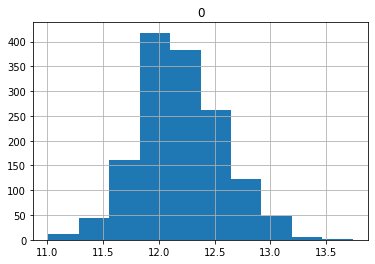

In [70]:
predictions.hist()

In [71]:
predictions.rename({0:'Predicted SalePrice'},axis=1, inplace=True)

In [72]:
predictions.to_csv('Predicted SalePrice.csv')